In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
pd.set_option('display.max_rows', 500)

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Data Preparation

* focus is always to understand the final data structure
* support each step by visual analytics

## Johns Hopkins GITHUB csv data


In [2]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [3]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,784,840,906,933,996,1026,1092,1176,1279,1351
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,494,518,539,548,562,584,609,634,663,678
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,673,673,696,704,713,717,717,723,723,731
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,24,24,24,24,25,25,25


In [4]:
time_idx=pd_raw.columns[4:]

In [5]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [6]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                   Antigua and Barbuda
6                             Argentina
7                               Armenia
8                             Australia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                              Austria
17                           Azerbaijan
18                              Bahamas
19                              Bahrain
20                           Bangladesh
21                             Barbados
22                              Belarus
23                              Belgium
24                                Benin


In [7]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [8]:
country_list=['Italy',
              'US',
              'Spain',
              'Germany',
              'Korea, South',
             ] 

In [9]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

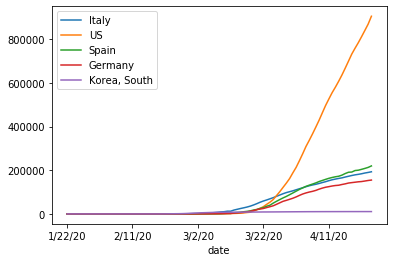

In [10]:
%matplotlib inline
df_plot.set_index('date').plot()

## Data Type Date

In [11]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,1/22/20,0,1,0,0,1
1,1/23/20,0,1,0,0,1
2,1/24/20,0,2,0,0,2
3,1/25/20,0,2,0,0,2
4,1/26/20,0,5,0,0,3


In [12]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date] # convert to datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # convert back to date ISO norm (str)

In [13]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


In [15]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';',index=False)

## Relational data model - defining a primary key

In the relational model of databases, a primary key is a specific choice of a minimal set of attributes (columns) that uniquely specify a tuple (row) in a relation (table) (source: wiki)


A primary key’s main features are:

* It must contain a unique value for each row of data.
* It cannot contain null values.

In [16]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,784,840,906,933,996,1026,1092,1176,1279,1351
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,494,518,539,548,562,584,609,634,663,678
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,673,673,696,704,713,717,717,723,723,731
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,24,24,24,24,25,25,25


In [17]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')  #ensure a sring, important for indexing

In [18]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,784,840,906,933,996,1026,1092,1176,1279,1351
1,no,Albania,0,0,0,0,0,0,0,0,...,494,518,539,548,562,584,609,634,663,678
2,no,Algeria,0,0,0,0,0,0,0,0,...,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127
3,no,Andorra,0,0,0,0,0,0,0,0,...,673,673,696,704,713,717,717,723,723,731
4,no,Angola,0,0,0,0,0,0,0,0,...,19,19,19,24,24,24,24,25,25,25


In [19]:
pd_relational_model=pd_data_base.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model.head()


,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [20]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [21]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [22]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [23]:
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

In [24]:
print(pd_relational_model[pd_relational_model['country']=='US'].tail())

            date state country  confirmed
23746 2020-04-20    no      US     784326
24010 2020-04-21    no      US     811865
24274 2020-04-22    no      US     840351
24538 2020-04-23    no      US     869170
24802 2020-04-24    no      US     905358


## Attention due to the new structure of the Johns Hopkins data set the state information US is in a second file

In [25]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
pd_raw_US=pd.read_csv(data_path)
pd_raw_US.head()



,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20
0,16.0,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316.0,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,135,135,136,136,136,136,136,136,139,141
2,580.0,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,13,13,13,14,14,14,14,14,14,14
3,630.0,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,974,1043,1068,1118,1213,1252,1298,1252,1416,1276
4,850.0,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,51,51,51,53,53,53,53,54,54,54


In [26]:
# drop all non relevant fields! 
# Many of this fields do not belong to 
# a transactional data. These fields belong to so called master data
pd_raw_US=pd_raw_US.drop(['UID', 'iso2', 'iso3', 'code3', 'Country_Region','FIPS', 'Admin2',  'Lat', 'Long_', 'Combined_Key'],axis=1)
pd_data_base_US=pd_raw_US.rename(columns={'Province_State':'state'}).copy()


In [27]:
## the stack command has problems when only one information is available within a stacking level
pd_relational_model_US=pd_data_base_US.set_index(['state']) \
                                .T                              \
                                .stack()             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model_US['country']='US'
pd_relational_model_US['date']=[datetime.strptime( each,"%m/%d/%y") for each in pd_relational_model_US.date] # convert to datetime
pd_relational_model_US.head()

,date,state,confirmed,country
0,2020-01-22,American Samoa,0,US
1,2020-01-22,Guam,0,US
2,2020-01-22,Northern Mariana Islands,0,US
3,2020-01-22,Puerto Rico,0,US
4,2020-01-22,Virgin Islands,0,US


In [28]:
# update the large relational file

In [29]:
pd_relational_model_all=pd_relational_model[pd_relational_model['country']!='US'].reset_index(drop=True)

In [30]:
pd_relational_model_all=pd.concat([pd_relational_model_all,pd_relational_model_US],ignore_index=True)

In [31]:
pd_relational_model_all.to_csv('../data/processed/20200424_COVID_relational_confirmed.csv',sep=';',index=False)

In [32]:
print(pd_relational_model_all[pd_relational_model_all['country']=='US'])

             date                     state country  confirmed
24722  2020-01-22            American Samoa      US          0
24723  2020-01-22                      Guam      US          0
24724  2020-01-22  Northern Mariana Islands      US          0
24725  2020-01-22               Puerto Rico      US          0
24726  2020-01-22            Virgin Islands      US          0
...           ...                       ...     ...        ...
331345 2020-04-24                      Utah      US          8
331346 2020-04-24                      Utah      US         81
331347 2020-04-24                      Utah      US          9
331348 2020-04-24                      Utah      US        140
331349 2020-04-24                      Utah      US          0

[306628 rows x 4 columns]


### cross check on full sum US data

In [33]:
check_US=pd_relational_model_all[pd_relational_model_all['country']=='US']

In [34]:

check_US[['date','country','confirmed']].groupby(['date','country']).sum()

,,confirmed
date,country,
2020-01-22,US,1
2020-01-23,US,1
2020-01-24,US,2
2020-01-25,US,2
2020-01-26,US,5
2020-01-27,US,5
2020-01-28,US,5
2020-01-29,US,5
2020-01-30,US,5
